In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.stats import randint

from mnoisy.noise.msequence import MSequence
from mnoisy.image import NoiseGridGenerator

from IPython.display import HTML

%matplotlib notebook

In [2]:
img_shape = 63
grid = np.zeros((img_shape, img_shape))

seq = MSequence(8)
for i, sd in enumerate(np.array(randint(0, 2048).rvs(size=img_shape))):
    # image size is limited by the sequence length (2**n - 1)
    grid[i] = seq.generate_noise_1d(sd)[:img_shape]

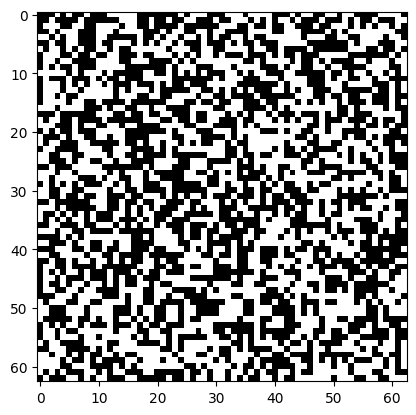

In [3]:
plt.imshow(grid, cmap="gray", interpolation="nearest")

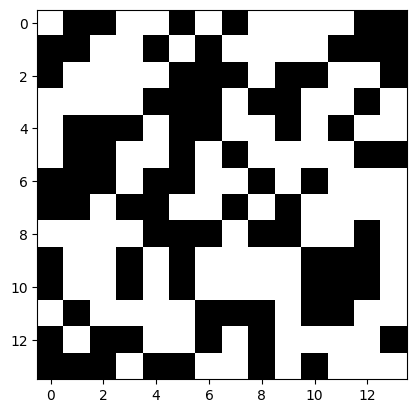

In [8]:
img_size = 14
ng = NoiseGridGenerator(img_size, MSequence(4))

num_frames = 30
frames = np.zeros((num_frames, img_size, img_size))
seed = 1234
for i, sd in enumerate(randint(0, 2048).rvs(size=num_frames, random_state=seed)):
    frames[i], _ = ng.generate_image(sd)


plt.imshow(frames[0], cmap="gray", interpolation="nearest")

In [10]:
# ref: https://matplotlib.org/stable/gallery/animation/dynamic_image.html
fig = plt.figure()

im = plt.imshow(frames[0], cmap="gray", interpolation="nearest")


def updatefig(i):
    im.set_array(frames[i])
    return (im,)


# interval is in ms
ani = animation.FuncAnimation(fig, updatefig, frames=num_frames, interval=1000, blit=True)

ani.save("noise.gif")
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
